# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [7]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [34]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

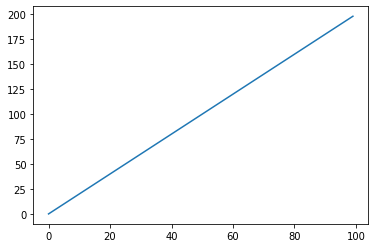

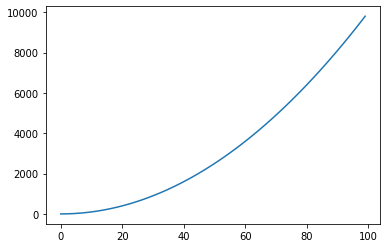

In [35]:
# Method 1
plt.plot(x,y)
plt.show()
plt.plot(x,z)
plt.show()
#plt.plot(x, y, label = "line 1")
#plt.plot(x, z, label = "line 2")
#plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

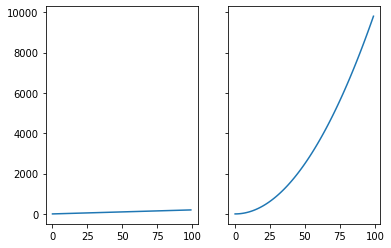

In [36]:
# Method 2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

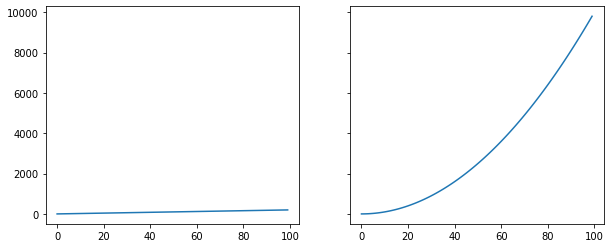

In [37]:
# your code here
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize = (10,4))
ax1.plot(x, y)
ax2.plot(x, z)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

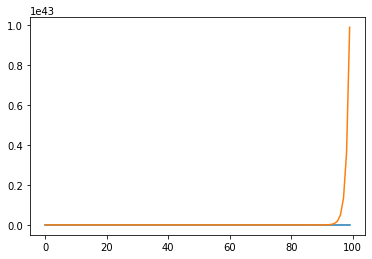

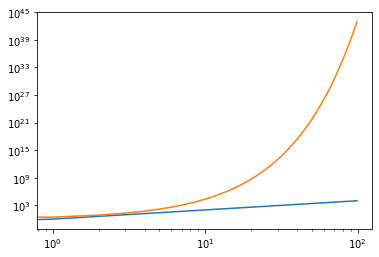

In [41]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.e**x

plt.plot(x, y, label = "line 1")
plt.plot(x, z, label = "line 2")
plt.show()

plt.plot(x, y, label = "line 1")
plt.plot(x, z, label = "line 2")
plt.xscale('log')
plt.yscale('log') 
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [58]:
# your code here
import pandas as pd
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.columns
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

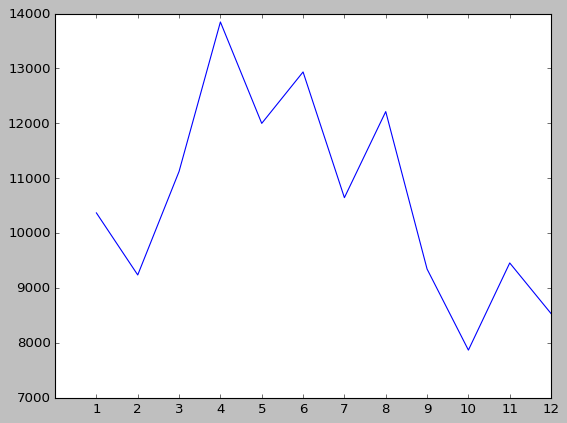

<ipython-input-212-f6db0053c483>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped2['Work_or_Weekend'][0] = 'Workday median'
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-212-f6db0053c483>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped2['Work_or_Weekend'][1] = 'Weekend median'


,Work_or_Weekend,Steps
0,Workday median,9998.0
1,Weekend median,10445.5


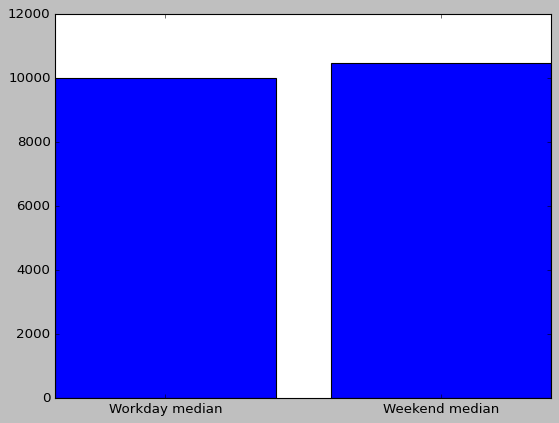

In [212]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
grouped = fitbit.groupby('Months_encoded').agg({'Steps':'median'}).reset_index()
grouped.head()
x  = grouped['Months_encoded']
y = grouped['Steps']
r = plt.plot(x,y)
plt.xticks(x)
plt.show()
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
grouped2  = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()

grouped2['Work_or_Weekend'][0] = 'Workday median'
grouped2['Work_or_Weekend'][1] = 'Weekend median'

grouped2.head()
a = grouped2['Work_or_Weekend']
b = grouped2['Steps']
plt.bar(a,b)
grouped2.head()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

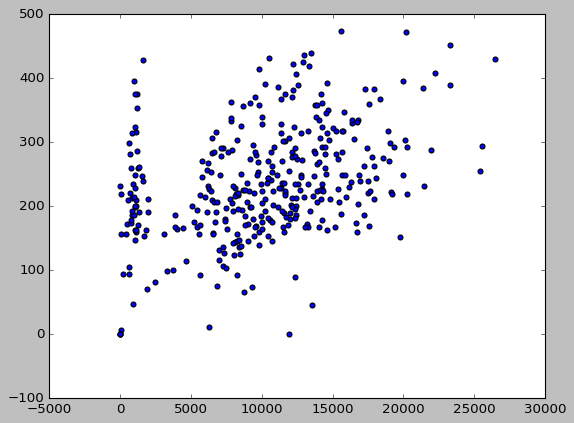

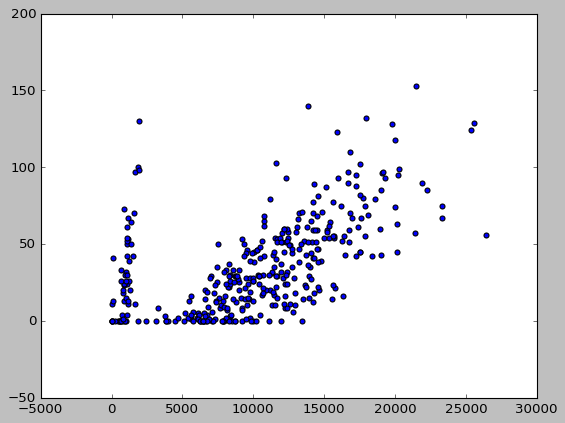

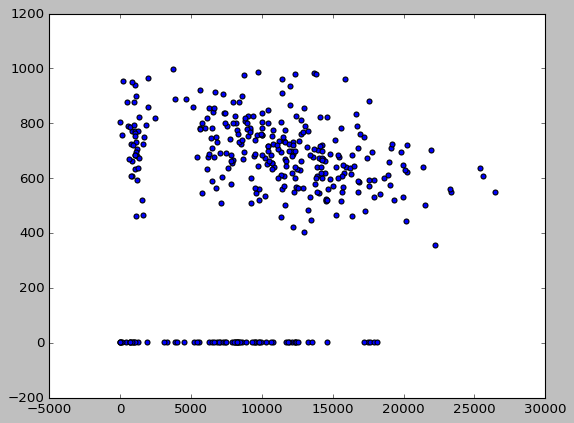

In [232]:
# your code here
columns = fitbit['Minutes Lightly Active'], fitbit['Minutes Very Active'], fitbit['Minutes Sedentary']
for column in columns:
    x = fitbit['Steps']
    y = column
    plt.scatter(x,y)
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [233]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [236]:
# your code here
titanic.head()
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [240]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [241]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [242]:
# your code here
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:>

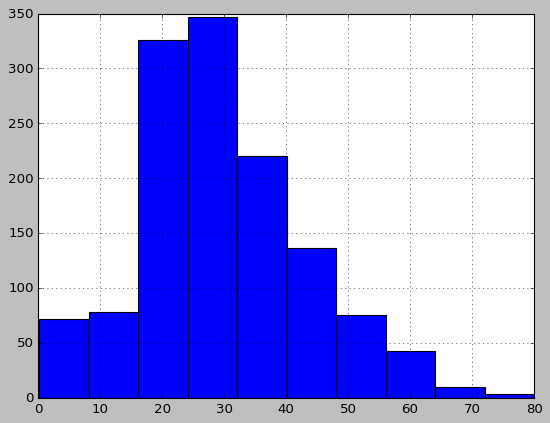

In [243]:
# your code here
titanic['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<ipython-input-244-a03f8eaea259>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().hist(titanic['Age'],bins = 20)
<ipython-input-244-a03f8eaea259>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().hist(titanic['Age'],bins = 50)


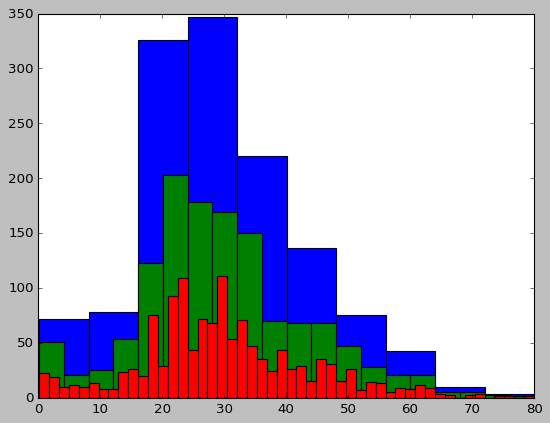

In [244]:
# your code here
plt.subplot().hist(titanic['Age'],bins = 10)
plt.subplot().hist(titanic['Age'],bins = 20)
plt.subplot().hist(titanic['Age'],bins = 50)
plt.show()

#### How does the bin size affect your plot?

In [245]:
"""
The smaller the bins, the lower the overall frequencies per bin
"""


'\nThe smaller the bins, the lower the overall frequencies per bin\n'

#### Use seaborn to show the distribution of column `Age`.

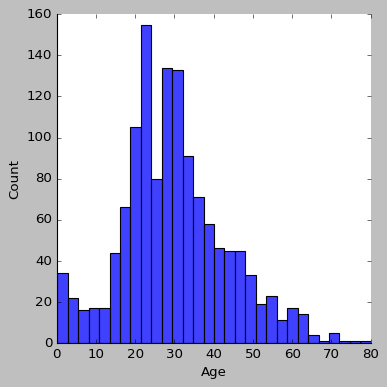

In [246]:
# your code here
sns.displot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843., 466.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

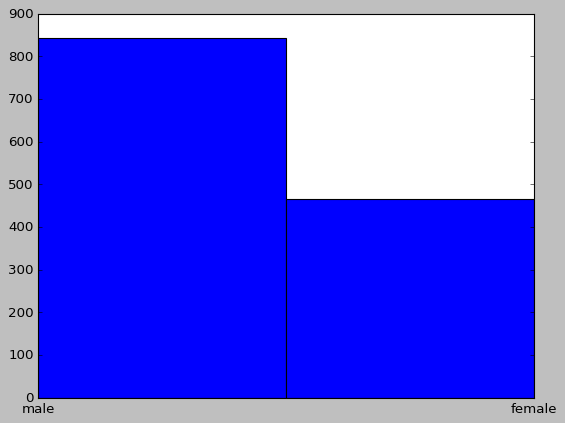

In [247]:
# Method 1 - matplotlib
# your code here
plt.hist(titanic['Gender'], bins = 2)

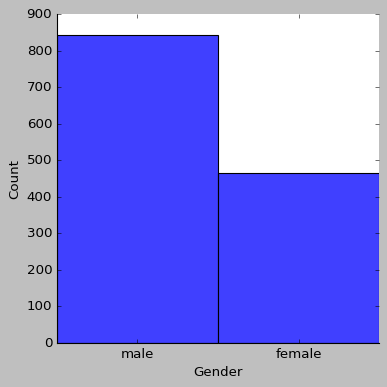

In [248]:
# Method 2 - seaborn
# your code here
sns.displot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

(array([323., 277., 709.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

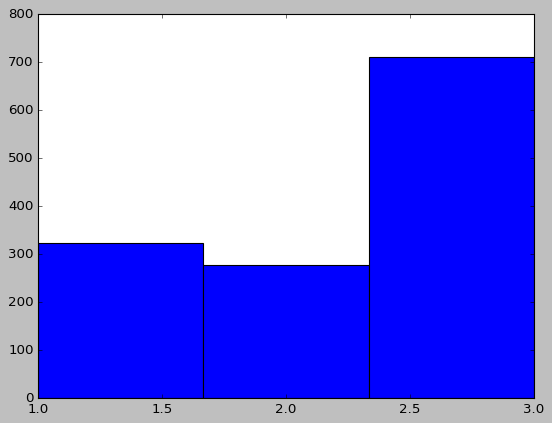

In [249]:
# your code here
names = ['Class1','Class2','Class3']
plt.hist(titanic['Pclass'], bins = 3)


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

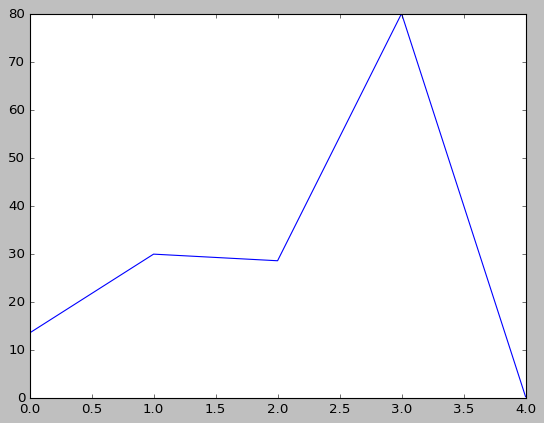

In [270]:
# your code here
#sns.pairplot(titanic, x_vars = ['Survived','Pclass','Age'],y_vars = ['Age'])
#plt.subplot().hist(titanic['Gender'])
#titanic.plot.bar(stacked=True);
#fig, ax = plt.subplots()

#ax.bar(labels, men_means, width, yerr=men_std, label='Men')
#ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#       label='Women')
y = [titanic['Age'].std(),titanic['Age'].mean(),titanic['Age'].median(),titanic['Age'].max(),titanic['Age'].min()]
plt.plot(y)

In [272]:
"""
I chose to use a simple plot, as it allows me to visualize the statistics I need withought overcomplicating the code
It would be unnecesary to do more if the sole purpose of this graph is to understand these stats.
"""

'\nI chose to use a simple plot, as it allows me to visualize the statistics I need withought overcomplicating the code\nIt would be unnecesary to do more if the sole purpose of this graph is to understand these stats.\n'

#### What does the last plot tell you about the feature `Age`?

In [273]:
"""
your comments here
The median age is just under 30, and there was someone on the boat that was unborn(ie a pregnant woman was on board)
There was also an 80 year old on the boat.
"""

'\nyour comments here\nThe median age is just under 30, and there was someone on the boat that was unborn(ie a pregnant woman was on board)\nThere was also an 80 year old on the boat.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

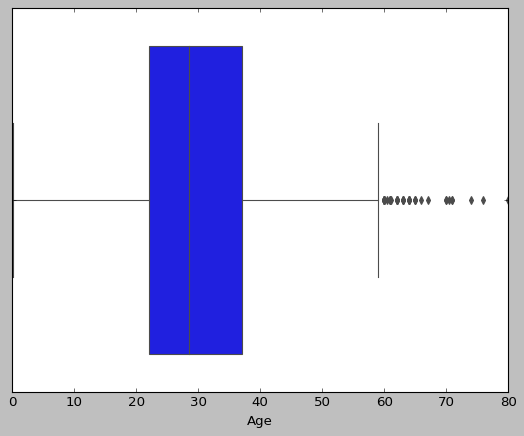

In [274]:
# your code here
sns.boxplot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [275]:
"""
There are are a significant amount of outliers (beyong the 75% quartile) above the age of 6
"""

'\nThere are are a significant amount of outliers (beyong the 75% quartile) above the age of 6\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

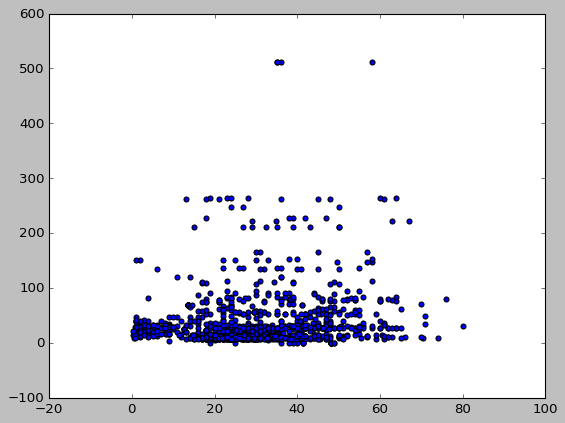

In [285]:
# Method 1 - matplotlib
# your code here
#grouped3 = titanic.groupby('Age')
y = titanic['Fare']
x = titanic['Age']
plt.scatter(x,y)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

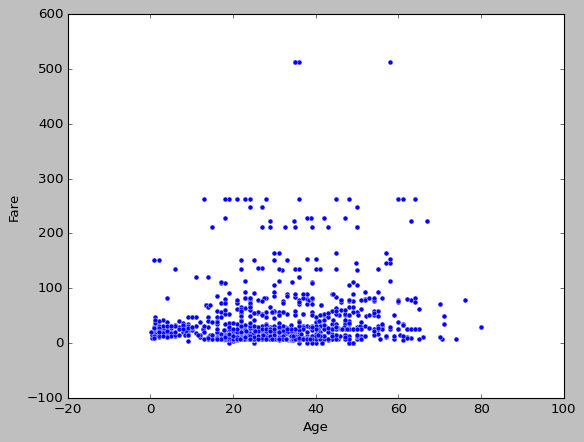

In [286]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x,y)

#### Plot the correlation matrix using seaborn.

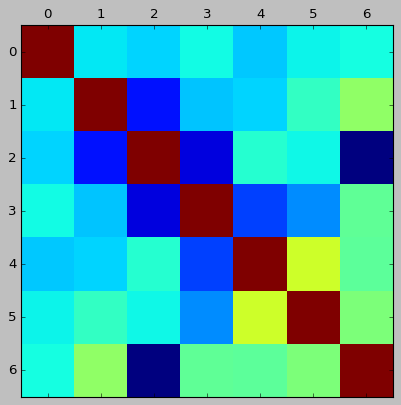

In [295]:
# your code here
only_numerics = titanic[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]
#titanic.select_dtypes('number')
plt.matshow(only_numerics.corr())
plt.show()


#### What are the most correlated features?

In [ ]:
"""
The people who survived and the fare that they payed
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

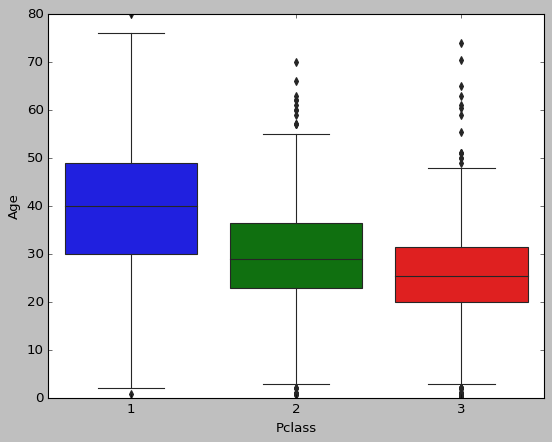

In [289]:
# your code here
x= titanic['Age']
y = titanic['Pclass']
sns.boxplot(y,x)


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

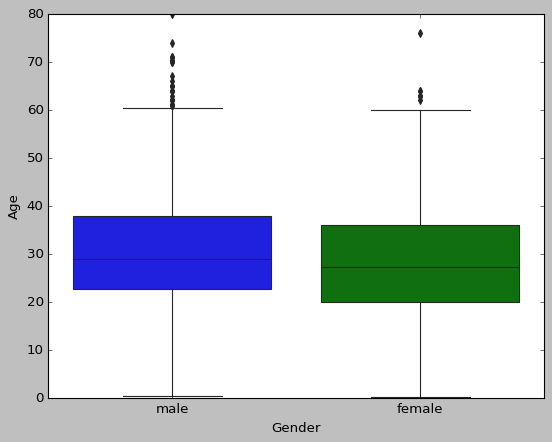

In [291]:
# your code here
x= titanic['Age']
y = titanic['Gender']
sns.boxplot(y,x)